In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/PawanKumar/ML Notes/AQI Project/Data/Real-Data/final_data_list.csv')

In [4]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1,284.795833
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0,182.187500
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3,223.208333
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2,200.645833
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3,285.225000


In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

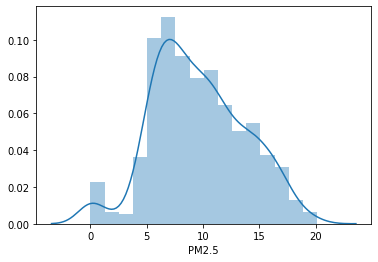

In [14]:
# Now making dependent and independent values
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]  #Independent Feature
y = df.iloc[:, -1] #Dependent feature
sns.distplot(np.sqrt(y))
min_max= MinMaxScaler()
X= min_max.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)
from sklearn import metrics

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [18]:
dtree.score(X_train, y_train).round(4), dtree.score(X_test, y_test).round(4)
# So, from the rsult we can certainly say that there is over-fitting condition.

(1.0, 0.2892)

In [19]:
#Using croos-validation 
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree, X, y, cv = 5)

In [20]:
score.mean().round(4)

0.3079

In [29]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus

In [21]:
feature = list(df.columns[:-1])

In [22]:
import os

In [23]:
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+ r'\Library\bin\graphviz'

In [24]:
# dot_data = StringIO()
# export_graphviz(dtree, out_file=dot_data, feature_names=feature, filled=True, rounded=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

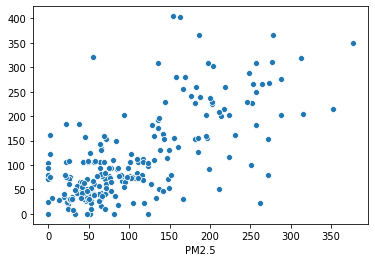

In [25]:
sns.scatterplot(y_test, y_pred)

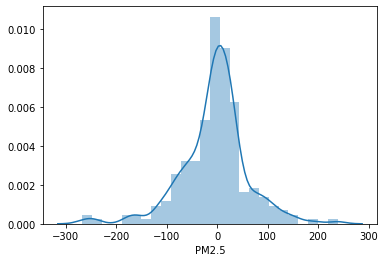

In [27]:
sns.distplot(y_test-y_pred)

# Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [33]:
parameters = {'ccp_alpha':[0.0, 0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 4.0], 'criterion':['mse'],
              'max_depth':[None,1,3,5,10,12,15,20],
                      'max_leaf_nodes':[None, 10,20,30,40,50,60,80,100],
                      'min_samples_leaf':[1,3,5,8,10],
                      'min_weight_fraction_leaf':[0.0, 0.1, 0.2, 0.3,0.5, 0.8],
                      'splitter':['best','random'], 'max_features':[None, 'sqrt', 'auto', 'log2']}

In [36]:
random_search = RandomizedSearchCV(dtree, parameters,cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search= GridSearchCV(dtree, parameters,cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [40]:
random_search.fit(X,y)
# grid_search.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [44]:
random_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=4.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
y_prediction = random_search.predict(X_test)

In [47]:
metrics.r2_score(y_test, y_prediction)

0.7239176359445012

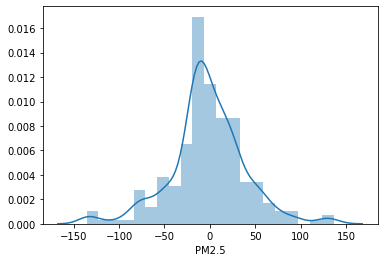

In [48]:
sns.distplot(y_test-y_prediction)

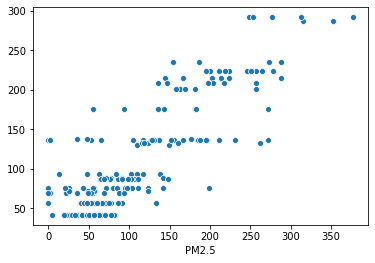

In [49]:
sns.scatterplot(y_test, y_prediction)

In [50]:
# Saving to pickle file
import pickle

In [52]:
file = open('decision_tree.pkl', 'wb')
pickle.dump(random_search, file)

In [53]:
metrics.mean_squared_error(y_test, y_prediction)

1752.001146043529

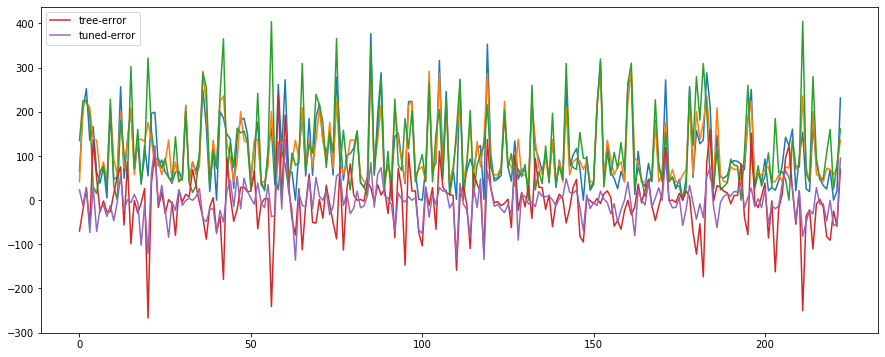

In [70]:
plt.figure(figsize=(15,6))
c= [i for i in range(len(y_test))]
plt.plot(c, y_test)
plt.plot(c, y_prediction)
plt.plot(c,y_pred)
plt.plot(c, y_test-y_pred, label='tree-error')
plt.plot(c, y_test-y_prediction, label='tuned-error')
plt.legend()